### Подготовка

Устанавливаем библиотеки.

Подробнее ознакомиться с библиотекой для построения транспортных графов IduEdu можно на [GitHub](https://github.com/DDonnyy/IduEdu/tree/main).


In [ ]:
!pip install blocksnet iduedu mapclassify -qq

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
import geopandas as gpd
import os

Добавляем переменную ```data_path```, в которую будем складывать результаты работы в блокноте. Обратите внимание, что также необходимо создать папку ```data``` в директории.

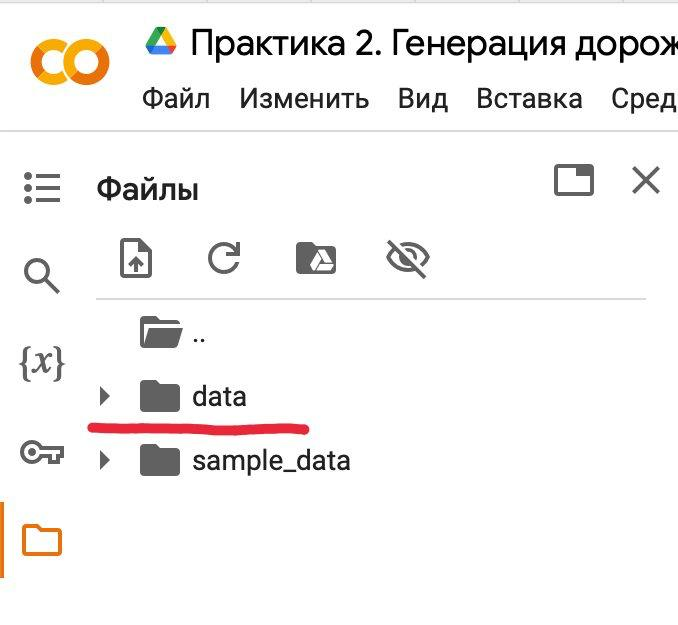

In [ ]:
blocks = gpd.read_file(os.path.join('blocks.geojson')) # считываем в переменную наши кварталы

### Сборка дорожного графа

Импортируем метод ```get_boundary``` из IduEdu для получения геометрии города, для которого хотим собрать дорожный граф.

In [ ]:
from iduedu import get_boundary

bounds = get_boundary(osm_id=1650676) # (osm_id=...) передаем OSM id границ города, в данном примере г. Тюмень

Импортируем метод ```get_drive_graph``` для скачивания дорожного графа по полигону.

In [ ]:
from iduedu import get_drive_graph

G_drive = get_drive_graph(polygon=bounds, additional_edgedata=['highway', 'maxspeed', 'reg', 'ref','name'])

В функцию ```get_drive_graph``` можно передать аргумент ```additional_edgedata``` для получения дополнительной информации о скачиваемых дорогах:

* ```highway``` – описание важности дороги в дорожной сети, подробнее [тут](https://wiki.openstreetmap.org/wiki/RU:Key:highway);

* ```maxspeed``` – максимально разрешённая скорость в км/ч, подробнее [тут](https://wiki.openstreetmap.org/wiki/RU:Key:maxspeed);

* ```reg``` – регистрационный статус дороги (1 – дорога федерального значения; 2 – дорога регионального значения; 3 – дорога местного значения);

* ```ref``` – используется для ссылочных номеров или кодов, подробнее [тут](https://wiki.openstreetmap.org/wiki/RU:Key:ref?uselang=ru);

* ```name``` – название дороги (если есть на OSM).

In [ ]:
G_drive # в этой переменной хранится собранный граф

In [ ]:
from blocksnet import AccessibilityProcessor
AccessibilityProcessor._fix_graph(G_drive) # необходимо для исправления графа, запустить!

Импортируем доп. библиотеки для визуализации графа.

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

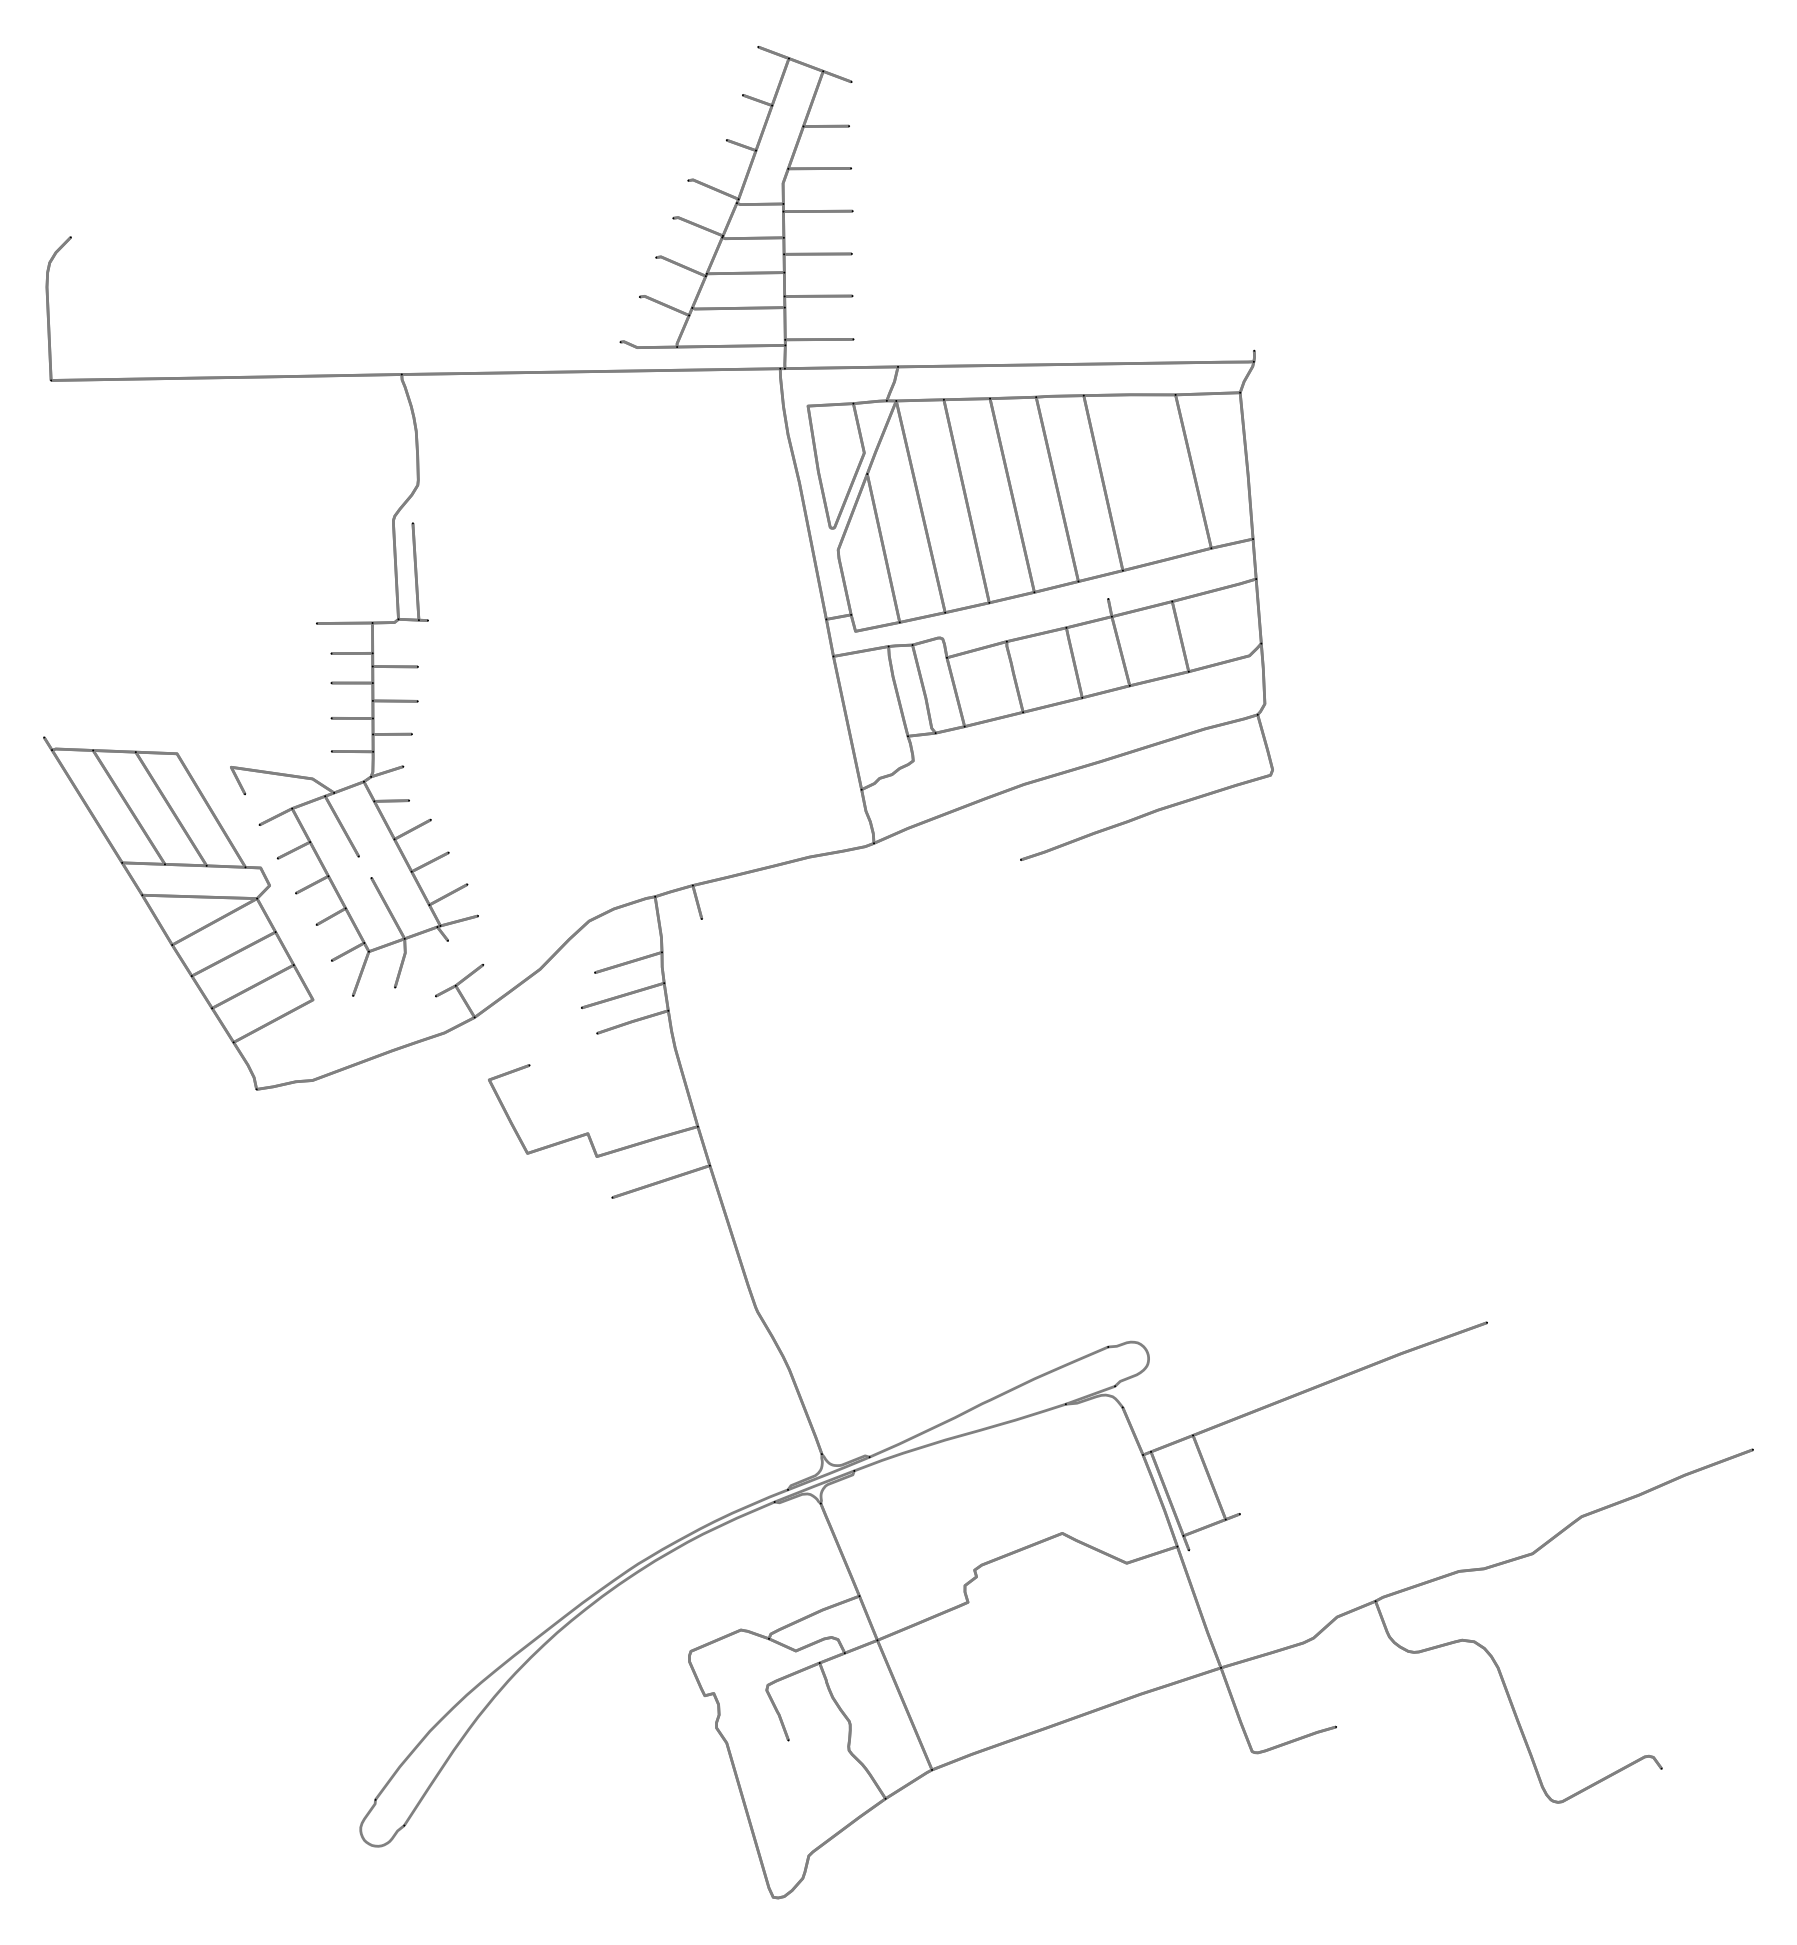

In [ ]:
fig, ax = ox.plot_graph(G_drive,
                    node_color='black', # цвет вершин
                    edge_color='grey', # цвет ребер
                    bgcolor='white', # цвет подложки
                    node_size=2, # размер верщин
                    edge_linewidth=2, # толщина ребер
                    figsize=(25,25)) # размер картинки

Сохраняем полученный результат в png файл.

In [ ]:
fig.savefig(os.path.join('drive_graph_image.png'))

Для того чтобы посмотреть какая информация у нас есть о собранных дорогах, переведем граф в два ```GeoDataFrame```’а.

In [ ]:
n,e = ox.graph_to_gdfs(G_drive)

```GeoDataFrame``` с вершинами дорожного графа (нодами, ```n``` – сокр. nodes).




In [ ]:
n

,y,x,street_count,highway,geometry
osmid,,,,,
69312527,6.625026e+06,332831.883351,4,NaN,POINT (332831.883 6625025.663)
1389770836,6.625047e+06,332832.723532,1,NaN,POINT (332832.724 6625047.404)
308245308,6.624965e+06,332804.980970,3,NaN,POINT (332804.981 6624964.835)
1389921312,6.625016e+06,332131.833415,3,NaN,POINT (332131.833 6625015.650)
275061859,6.625001e+06,331155.582852,4,NaN,POINT (331155.583 6625000.676)
...,...,...,...,...,...
11872317122,6.625489e+06,332035.657316,1,turning_circle,POINT (332035.657 6625489.194)
11872317134,6.625597e+06,331984.642108,3,NaN,POINT (331984.642 6625597.076)
11872317128,6.625064e+06,331585.965922,1,turning_circle,POINT (331585.966 6625064.290)


```GeoDataFrame``` с ребрами дорожного графа (эджи, ```e``` – сокр. edges).

Колонка ```time_min``` содержит в себе значения времени в минутах, за которое можно проехать на автомобиле данный участок дороги.

In [ ]:
e

length_meter  time_min  \
u           v           key                           
69312527    1389770836  0          21.851     0.033   
            308245308   0          66.914     0.100   
            1389921312  0         700.125     0.700   
1389770836  69312527    0          21.851     0.033   
308245308   660585761   0         127.194     0.191   
...                                   ...       ...   
11872317134 11872317137 0          59.630     0.089   
            11872317121 0         115.150     0.173   
11872317128 11872317130 0         113.936     0.171   
11872317137 11872317134 0          59.630     0.089   
11872317136 11872317135 0          64.491     0.097   

                                                                      geometry  \
u           v           key                                                      
69312527    1389770836  0    LINESTRING (332831.883 6625025.663, 332833.215...   
            308245308   0    LINESTRING (332831.883 6625025.663, 332829.677...   
            1389921312  0    LINESTRING (332831.883 6625025.663, 332820.237...   
1389770836  69312527    0    LINESTRING (332832.724 6625047.404, 332833.215...   
308245308   660585761   0    LINESTRING (332804.981 6624964.835, 332677.858...   
...                                                                        ...   
11872317134 11872317137 0    LINESTRING (331984.642 6625597.076, 332040.478...   
            11872317121 0    LINESTRING (331984.642 6625597.076, 331945.842...   
11872317128 11872317130 0    LINESTRING (331585.966 6625064.290, 331592.503...   
11872317137 11872317134 0    LINESTRING (332040.478 6625576.147, 331984.642...   
11872317136 11872317135 0    LINESTRING (331856.911 6625644.958, 331917.296...   

                                  highway     maxspeed  reg  \
u           v           key                                   
69312527    1389770836  0    unclassified   666.666667    3   
            308245308   0    unclassified   666.666667    3   
            1389921312  0       secondary  1000.000000    2   
1389770836  69312527    0    unclassified   666.666667    3   
308245308   660585761   0     residential   666.666667    3   
...                                   ...          ...  ...   
11872317134 11872317137 0     residential   666.666667    3   
            11872317121 0     residential   666.666667    3   
11872317128 11872317130 0     residential   666.666667    3   
11872317137 11872317134 0     residential   666.666667    3   
11872317136 11872317135 0     residential   666.666667    3   

                                             name  ref  
u           v           key                             
69312527    1389770836  0                     NaN  NaN  
            308245308   0                     NaN  NaN  
            1389921312  0                 41К-015  NaN  
1389770836  69312527    0                     NaN  NaN  
308245308   660585761   0    Красносельская улица  NaN  
...                                           ...  ...  
11872317134 11872317137 0              11-я аллея  NaN  
            11872317121 0        Большой проспект  NaN  
11872317128 11872317130 0              18-я аллея  NaN  
11872317137 11872317134 0              11-я аллея  NaN  
11872317136 11872317135 0              11-я аллея  NaN  

[494 rows x 8 columns]

Сохраняем вершины и ребра графа в файлы GeoJSON.

In [ ]:
n.to_file(os.path.join("G_drive_nodes.geojson"))

In [ ]:
e.to_file(os.path.join("G_drive_edges.geojson"))

### Создание матрицы доступности и квартально-сетевой модели + вычисление транспортной доступности и связности

Импортируем из BlocksNet класс ```AccessibilityProcessor```, необходимый для вычисления матрицы доступности по кварталам.

Создаем экземпляр класса в переменной ```ap``` и передаем туда кварталы ```blocks```.

In [ ]:
from blocksnet import AccessibilityProcessor

ap = AccessibilityProcessor(blocks)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Вызываем метод ```get_accessibility_matrix``` у экземпляра ```ap```, передавая дорожный граф. Переменная ```acc_mx``` будет содержать матрицу доступности.

In [ ]:
acc_mx = ap.get_accessibility_matrix(G_drive)
acc_mx.head() # вывод первых 5 строк полученной матрицы

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,2.859375,2.318359,5.464844,2.318359,1.793945,2.859375,2.859375,2.699219,2.501953,...,5.464844,2.501953,4.066406,4.539062,4.539062,2.753906,9.179688,11.078125,4.699219,10.406250
1,2.859375,0.000000,1.589844,2.925781,1.589844,1.066406,0.000000,0.000000,0.161011,2.779297,...,2.925781,2.779297,1.528320,2.000000,2.000000,2.025391,6.640625,8.546875,2.160156,7.863281
2,2.318359,1.589844,0.000000,4.191406,0.000000,0.523926,1.589844,1.589844,1.428711,2.238281,...,4.191406,2.238281,2.796875,3.267578,3.267578,1.484375,7.906250,9.812500,3.429688,9.132812
3,3.863281,1.822266,2.593750,0.000000,2.593750,2.068359,1.822266,1.822266,1.661133,3.783203,...,0.000000,3.783203,1.129883,1.601562,1.601562,1.691406,6.242188,8.148438,1.762695,7.468750
4,2.318359,1.589844,0.000000,4.191406,0.000000,0.523926,1.589844,1.589844,1.428711,2.238281,...,4.191406,2.238281,2.796875,3.267578,3.267578,1.484375,7.906250,9.812500,3.429688,9.132812


Сохраняем матрицу доступности в pickle файл.

In [ ]:
acc_mx.to_pickle(os.path.join('acc_mx.pickle'))

Импортируем из ```blocksnet.models``` класс ```City```.

In [ ]:
from blocksnet.models import City

Для создания квартально-сетевой модели города используются кварталы и матрица доступности. Чтобы модель собралась с учетом валидации данных, которая встроена в класс ```City```, необходимо добавить в кварталы информацию о зонировании территорий (землепользование). В случае если таких данных нет, то нужно добавить дополнительную колонку ```land_use``` с значениями ```None``` в ГеоДатаФрейм с кварталми.

In [ ]:
blocks['land_use'] = None

Создаем экземпляр класса в переменную ```city``` и отдаем туда кварталы и матрицу доступности.

In [ ]:
city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

Вывод основной информации о собранной модели: CRS, кол-во кварталов, типов сервисов, зданий и сервисов.

In [ ]:
print(city)

CRS : EPSG:32636
Blocks : 104
Service types : 0/66
Buildings : 0
Services : 0



Сохраняем модельку в pickle файл. Она вам пригодится на следующем практическом занятии :)

In [ ]:
city.to_pickle(os.path.join('city_model.pickle'))

Импортируем классы ```Accessibility``` и ```Connectivity``` для вычисления доступности и связности.

In [ ]:
from blocksnet import Accessibility, Connectivity

Создаем экземпляр класса в ```accessibility``` и передаем туда собранную модель. Вызываем метод ```calculate``` у экземпляра, передавая выбранный квартал. Метод рассчитывает доступность для данного квартала и сохраняет результат в переменной ```result```.

In [ ]:
accessibility = Accessibility(city_model=city)
block = city[60] # квартал от которого будем считать доступность
result = accessibility.calculate(block)

Визуализируем результат:

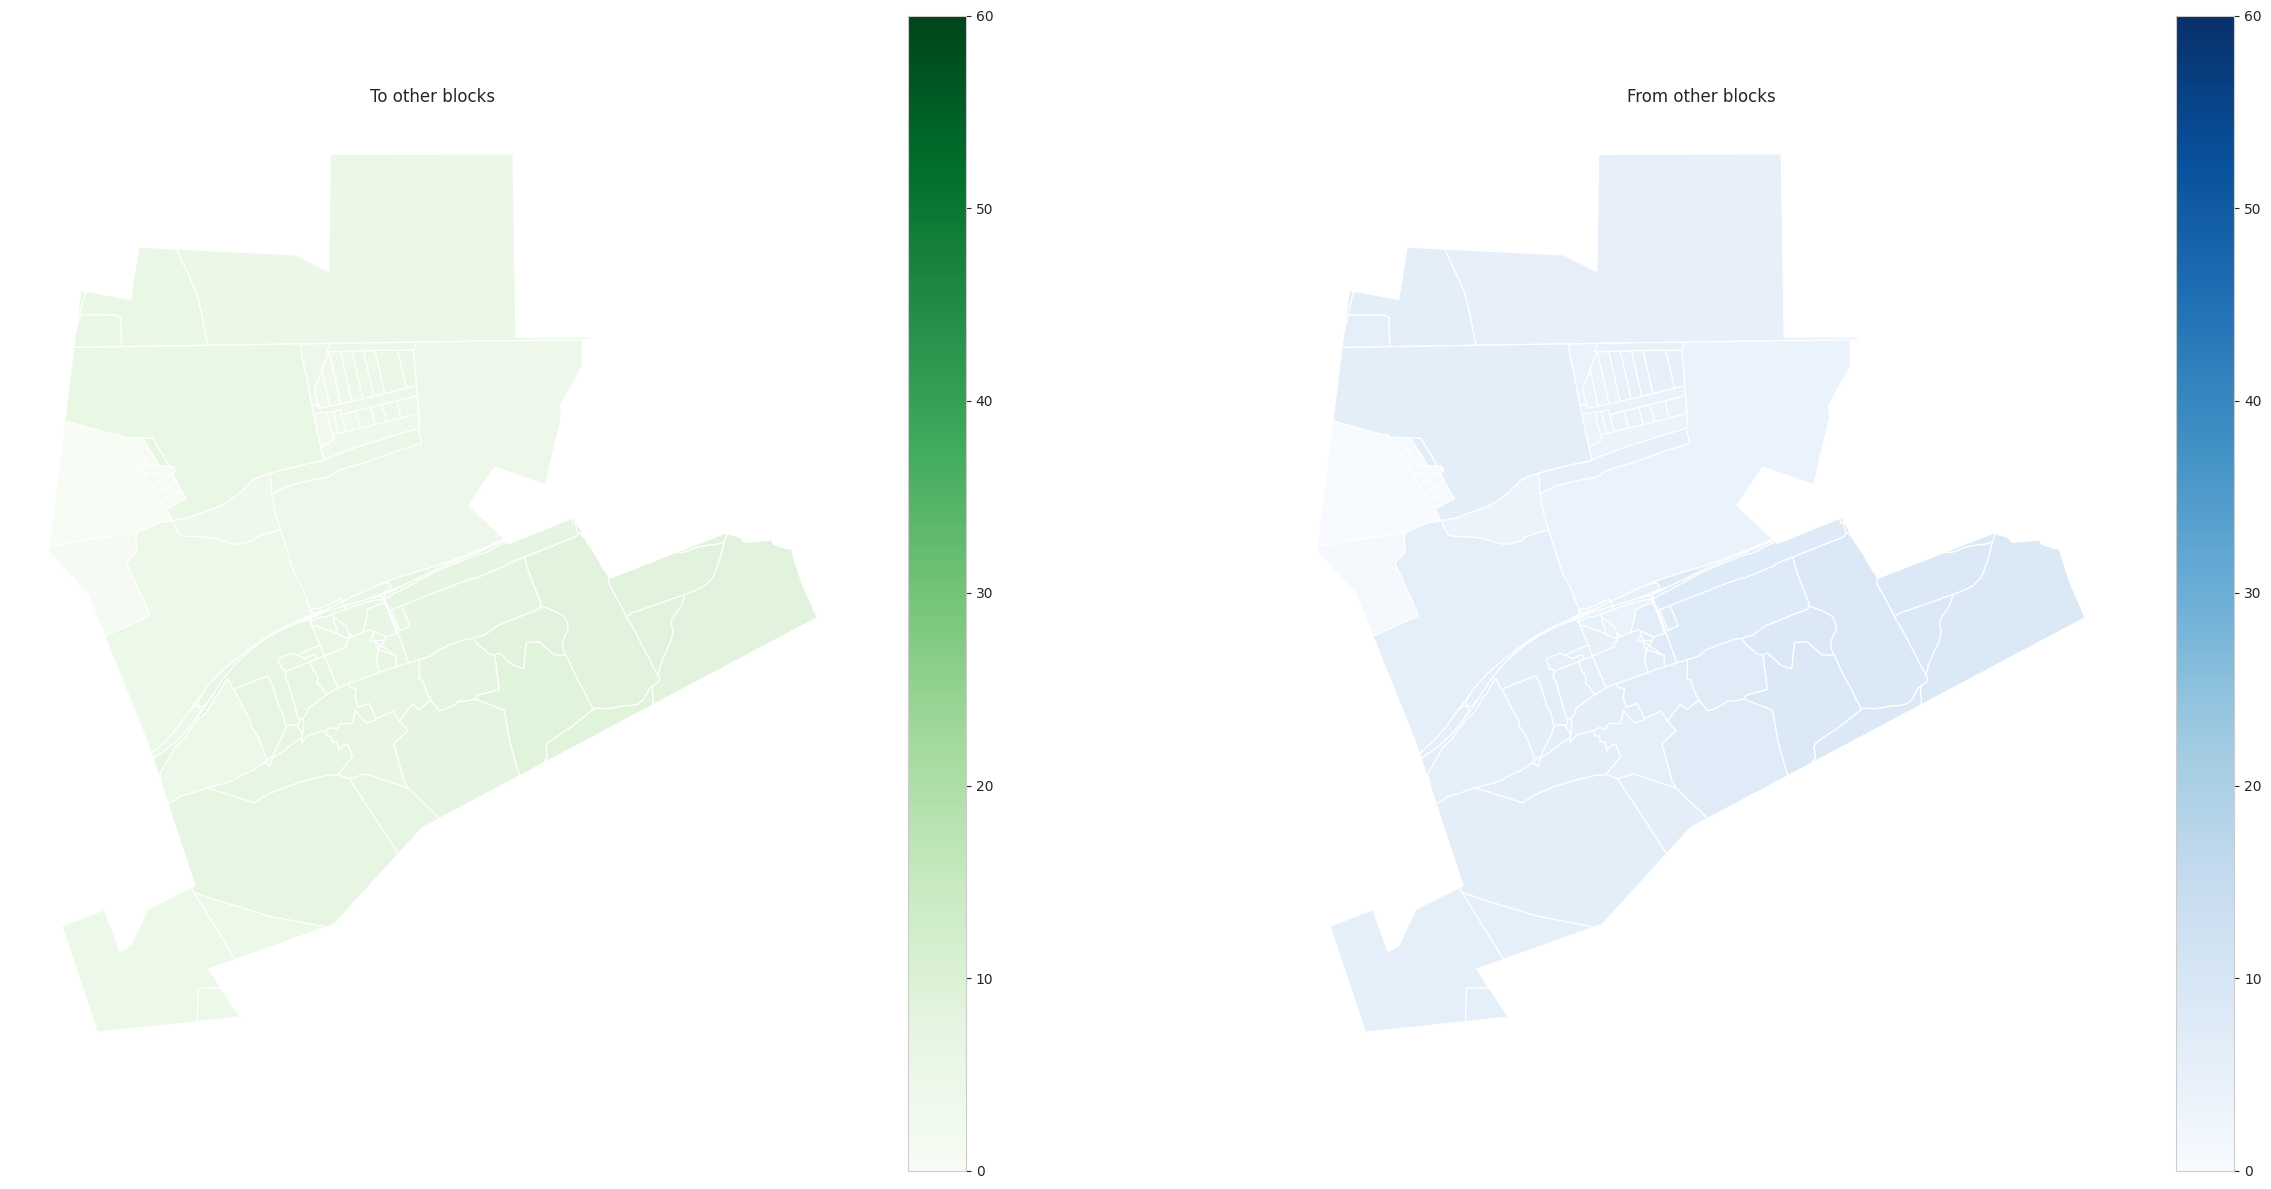

In [ ]:
Accessibility.plot(result, linewidth=0.9, figsize=(30,15))

Сохраняем результат в файл GeoJSON.

In [ ]:
result.to_file(os.path.join('accessibility.geojson'))

Для вычисления связности: создаем экземпляр класса в ```connectivity``` и передаем туда собранную модель. Вызываем метод ```calculate``` у экземпляра в переменную ```connectivity_result```.

In [ ]:
connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()

Визуализируем результат:

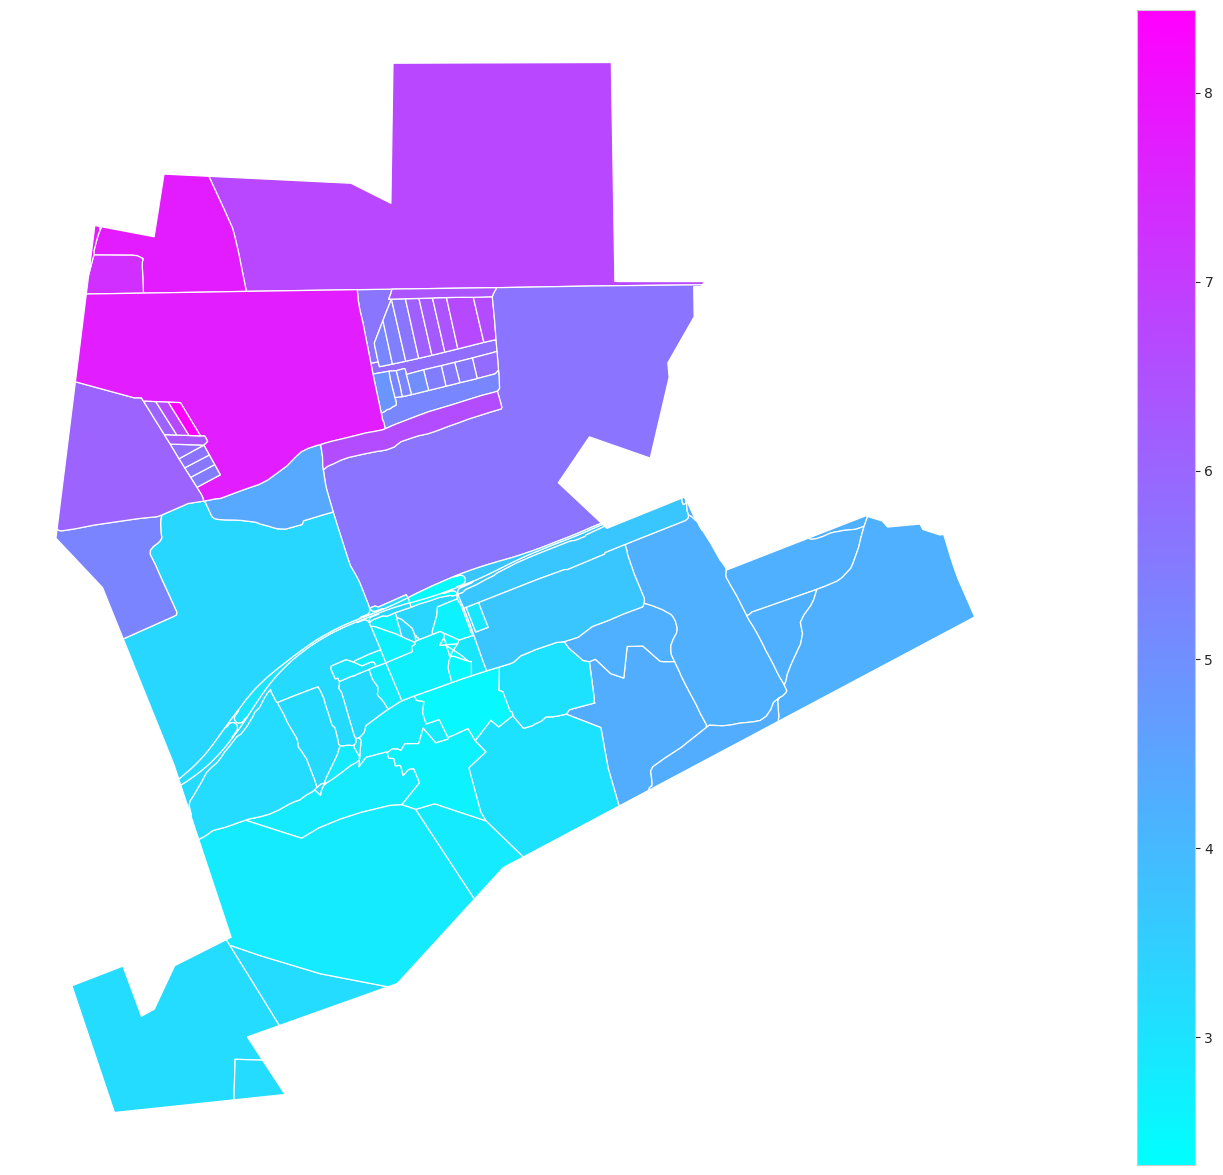

In [ ]:
Connectivity.plot(connectivity_result, linewidth=0.9, figsize=(30,15))

Сохраняем результат в файл GeoJSON.

In [ ]:
connectivity_result.to_file(os.path.join('connectivity.geojson'))

### Интермодальный граф общественного транспорта

Задание по желанию: попробуйте собрать интермодальный граф с помощью метода из BlocksNet ```get_intermodal_graph``` (пример в ячейке ниже), вычислить на основе этого графа новую матрицу доступности для ваших кварталов, собрать квартально-сетевую модель, посчитать доступность и связность и сравнить полученные результаты с моделью на дорожном графе.

In [ ]:
G_inter = ap.get_intermodal_graph()